# Set up

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import simfin as sf
from simfin.names import *
from IPython.display import display
import datetime
%matplotlib inline

#set the local directory where data-files are stored
sf.set_data_dir('C:/Users/think/Desktop/UVA/2020Spring/STAT_4996_Capstone/simfin_data/')

# 一个cell显示所有output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Set up API key
sf.set_api_key(api_key='free')

# Seaborn set plotting style.
sns.set_style("whitegrid")

#display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define functions

In [2]:
#calculate the proportion of non-missing value in each column
def prop_nonmissing(df):
    df2 = df.reset_index().copy()
    output = pd.DataFrame(index = df2.columns)
    nomiss_prop = []
    for c in df2.columns:
        nomiss_prop.append(round((1-(df2.loc[:,c].isnull().sum()/len(df2.loc[:,c])))*100,2))
    output['Prop'] = nomiss_prop
    return output

# Loading Data

## income statement

In [3]:
#load in entire annual income statement data
df_income_a = sf.load_income(variant='annual', market='us').reset_index()
#banks only
df_income_a_bank  = sf.load_income_banks(variant='annual', market='us').reset_index()
#insurance companies only
df_income_a_ins = df = sf.load_balance_insurance(variant='annual', market='us').reset_index()

"""
#load quarter data
df_income_q = sf.load_income(variant='quarterly', market='us')
df_income_q_bank  = sf.load_income_banks(variant='quarterly', market='us')
df_income_q_ins = df = sf.load_balance_insurance(variant='quarterly', market='us')

#load ttm data
df_income_ttm = sf.load_income(variant='ttm', market='us')
df_income_ttm_bank  = sf.load_income_banks(variant='ttm', market='us')
df_income_ttm_ins = df = sf.load_balance_insurance(variant='ttm', market='us')
"""

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-income-banks-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-annual" on disk (0 days old).
- Loading from disk ... Done!


"\n#load quarter data\ndf_income_q = sf.load_income(variant='quarterly', market='us')\ndf_income_q_bank  = sf.load_income_banks(variant='quarterly', market='us')\ndf_income_q_ins = df = sf.load_balance_insurance(variant='quarterly', market='us')\n\n#load ttm data\ndf_income_ttm = sf.load_income(variant='ttm', market='us')\ndf_income_ttm_bank  = sf.load_income_banks(variant='ttm', market='us')\ndf_income_ttm_ins = df = sf.load_balance_insurance(variant='ttm', market='us')\n"

## balance sheet

In [4]:
#load in entire annual balance sheet data 
df_balance_a = sf.load_balance(variant='annual', market='us').reset_index()
#banks only
df_balance_a_bank = sf.load_balance_banks(variant='annual', market='us').reset_index()
#insurance companies only
df_balance_a_ins = sf.load_balance_insurance(variant='annual', market='us').reset_index()

Dataset "us-balance-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-banks-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-annual" on disk (0 days old).
- Loading from disk ... Done!


## cash flow

In [5]:
#load in entire annual balance sheet data 
df_cashflow_a = sf.load_cashflow(variant='annual', market='us').reset_index()
#banks only
df_cashflow_a_bank = sf.load_cashflow_banks(variant='annual', market='us').reset_index()
#insurance companies only
df_cashflow_a_ins = sf.load_cashflow_insurance(variant='annual', market='us').reset_index()

Dataset "us-cashflow-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-banks-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-insurance-annual" on disk (0 days old).
- Loading from disk ... Done!


## Shareprice 

In [6]:
df_prices = sf.load_shareprices(variant='daily', market='us').reset_index()
df_prices_latest = sf.load_shareprices(variant='latest', market='us').reset_index()

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-shareprices-latest" on disk (0 days old).
- Loading from disk ... Done!


## Companies details

In [7]:
comp = sf.load_companies(market='us').reset_index()
industry = sf.load_industries().reset_index()

Dataset "us-companies" on disk (0 days old).
- Loading from disk ... Done!
Dataset "industries" on disk (0 days old).
- Loading from disk ... Done!


# Date exploration

## Income Statement 

结论：


1. Simfin ID 和 Ticker都是唯一的
2. 三个表之间公司无重合


In [8]:
#display all column names 
df_income_a.columns

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [9]:
#everything included
df_income_a.shape #(14768, 25)
df_income_a['Ticker'].nunique() #1915 stocks
df_income_a['SimFinId'].nunique() #same as above 

(14768, 27)

1915

1915

In [10]:
#看income dataset是否包含banks 和 insurance

intersection = set(df_income_a['SimFinId']) & set(df_income_a_bank['SimFinId'])
intersection #无重合

intersection2 = set(df_income_a['SimFinId']) & set(df_income_a_ins['SimFinId'])
intersection2 #无重合

set()

set()

In [11]:
#check non-missing value % of income statement
prop_nonmissing(df_income_a).sort_values(by = 'Prop',ascending = False)

,Prop
index,100.00
Publish Date,100.00
Net Income,100.00
Income (Loss) from Continuing Operations,100.00
Pretax Income (Loss),100.00
"Pretax Income (Loss), Adj.",100.00
Ticker,100.00
Net Income (Common),100.00
Fiscal Year,100.00
Report Date,100.00


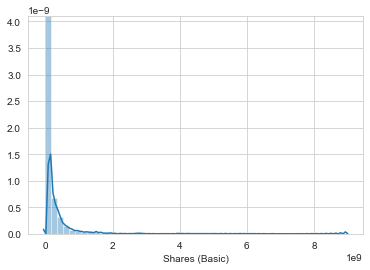

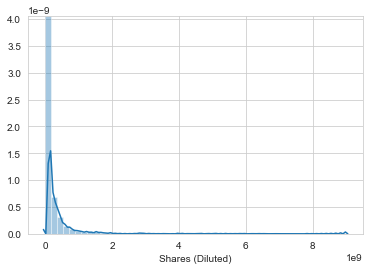

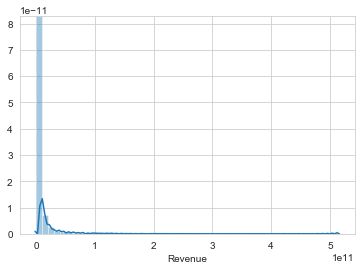

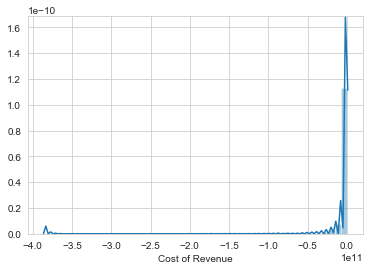

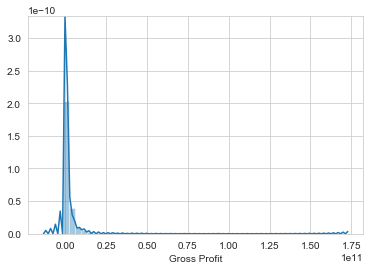

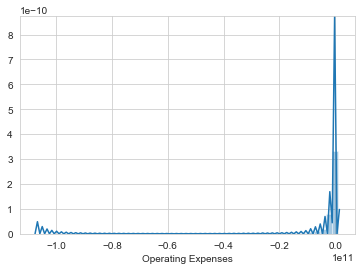

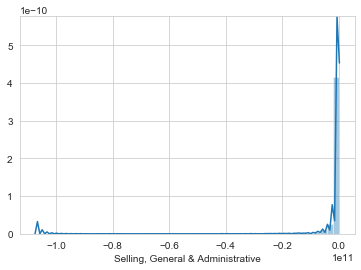

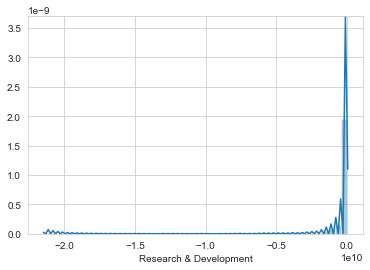

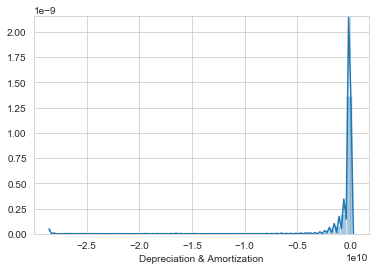

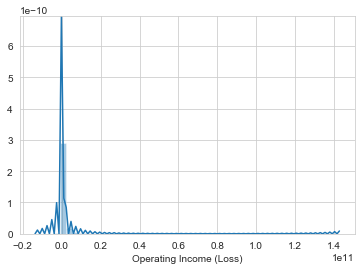

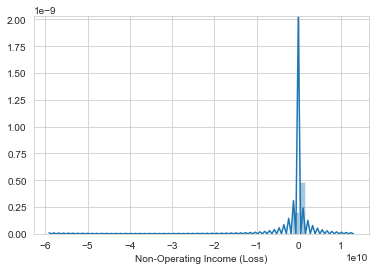

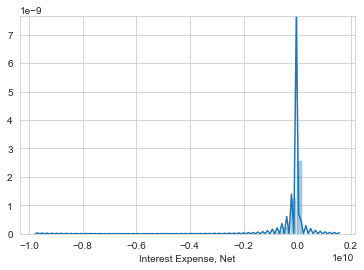

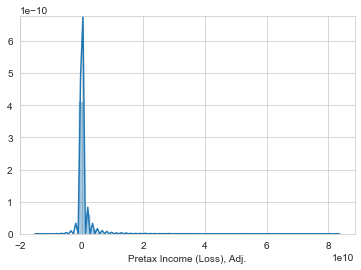

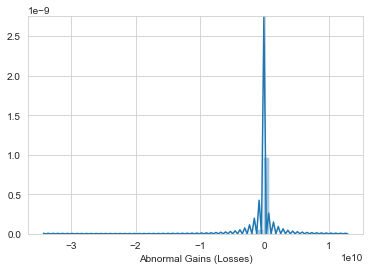

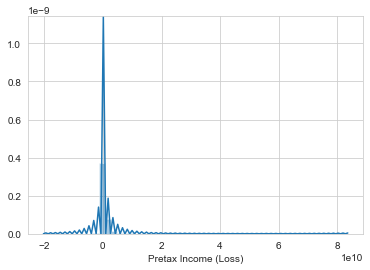

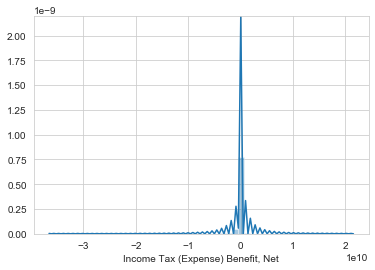

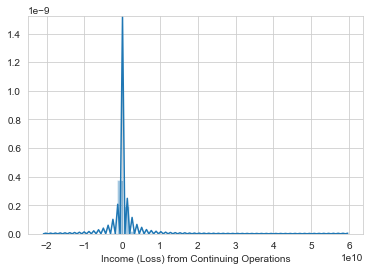

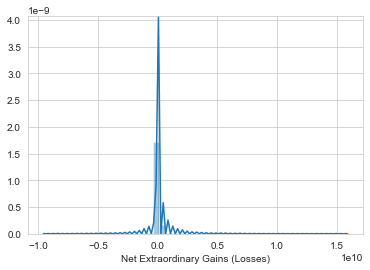

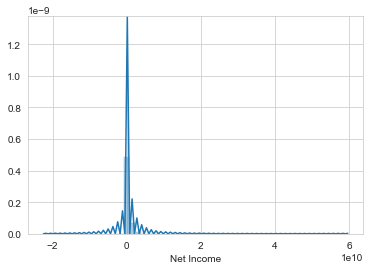

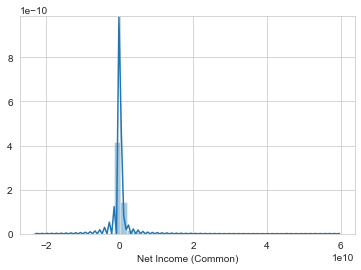

In [12]:
#plot distribution for each column
drop_c =['Ticker','Report Date','SimFinId','Currency','Fiscal Year','Fiscal Period', 'Publish Date' ]
df = df_income_a.drop(drop_c,axis=1)
for i, col in enumerate(df.columns):
    if isinstance(df[col], object):
        __ = plt.figure(i)
        _ = sns.distplot(df[col])
        plt.show()

## Balance Sheet

In [13]:
#display all column names 
df_balance_a.columns

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')

In [14]:
#everything included
df_balance_a.shape #(14768, 29)
df_balance_a['Ticker'].nunique() #1915 stocks
df_balance_a['SimFinId'].nunique() #same as above 

(14768, 29)

1915

1915

In [15]:
#看三张表重合度,无重合
intersection = set(df_balance_a['SimFinId']) & set(df_balance_a_bank['SimFinId'])
intersection #无重合

intersection2 = set(df_balance_a['SimFinId']) & set(df_income_a_ins['SimFinId'])
intersection2 #无重合

set()

set()

In [16]:
#balance sheet
prop_nonmissing(df_balance_a).sort_values(by='Prop',ascending = False)

,Prop
index,100.00
Publish Date,100.00
Total Liabilities,100.00
Total Current Liabilities,100.00
Total Assets,100.00
Ticker,100.00
Total Liabilities & Equity,100.00
Fiscal Period,100.00
Fiscal Year,100.00
Report Date,100.00


## Cash Flow

In [17]:
#display all column names 
df_cashflow_a.columns

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Net Income/Starting Line', 'Depreciation & Amortization',
       'Non-Cash Items', 'Change in Working Capital',
       'Change in Accounts Receivable', 'Change in Inventories',
       'Change in Accounts Payable', 'Change in Other',
       'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash'],
      dtype='object')

In [18]:
#everything included
df_cashflow_a.shape #(14768, 27)
df_cashflow_a['Ticker'].nunique() #1915 stocks
df_cashflow_a['SimFinId'].nunique() #same as above 

(14768, 27)

1915

1915

In [19]:
#看三张表重合度,无重合
intersection = set(df_cashflow_a['SimFinId']) & set(df_cashflow_a_bank['SimFinId'])
intersection #无重合

intersection2 = set(df_cashflow_a['SimFinId']) & set(df_cashflow_a_ins['SimFinId'])
intersection2 #无重合

set()

set()

In [20]:
#cash flow
prop_nonmissing(df_cashflow_a).sort_values(by='Prop', ascending = False)

,Prop
index,100.00
Fiscal Period,100.00
Net Cash from Operating Activities,100.00
Ticker,100.00
Publish Date,100.00
Net Change in Cash,100.00
Fiscal Year,100.00
SimFinId,100.00
Report Date,100.00
Currency,100.00


可以drop：Net Extraordinary Gains (Losses)	,Abnormal Gains (Losses), Depreciation， too much missing value and are not useful for calculating financial ratio

R&D是否需要drop？或许R&D投资高的企业profit margin比较高
Net extraordinary gain 和 loss或许可以做成categorical variable

## Stock Price

In [21]:
#display all column names
df_prices.columns

Index(['Ticker', 'Date', 'SimFinId', 'Open', 'Low', 'High', 'Close',
       'Adj. Close', 'Dividend', 'Volume'],
      dtype='object')

In [22]:
df_prices.shape #(5027050, 10)
df_prices['Ticker'].nunique()#2050 companies

(5027050, 10)

2050

In [23]:
#check missing values 
prop_nonmissing(df_prices).sort_values(by = 'Prop', ascending = False)

,Prop
index,100.00
Ticker,100.00
Date,100.00
SimFinId,100.00
Volume,100.00
Adj. Close,99.88
Open,98.38
Low,98.38
High,98.38
Close,98.38


## Company&Industry

In [24]:
#display all column names 
comp.columns
industry.columns

Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId'], dtype='object')

Index(['IndustryId', 'Sector', 'Industry'], dtype='object')

In [25]:
comp.shape #(2069, 4)
industry.shape #(71,3)
comp['Ticker'].nunique() #2069 stocks
industry['IndustryId'].nunique() #71 industries
industry['Industry'].nunique()#same as above
industry['Sector'].nunique()#12 sector

(2069, 4)

(71, 3)

2069

71

71

12

In [26]:
#check missing values
prop_nonmissing(comp)
prop_nonmissing(industry)

,Prop
index,100.0
Ticker,100.0
SimFinId,100.0
Company Name,100.0
IndustryId,91.2


,Prop
index,100.0
IndustryId,100.0
Sector,100.0
Industry,100.0


In [27]:
intersection3 = set(df_balance_a['SimFinId']) & set(df_income_a['SimFinId'])
len(intersection3) #有income和balance数据的是同一批公司

intersection4 = set(df_balance_a['SimFinId']) & set(df_cashflow_a['SimFinId'])
len(intersection4) #有income和balance数据的是同一批公司

1915

1915

# Join Data

In [28]:
comp.head(2)
industry.head(2)

,Ticker,SimFinId,Company Name,IndustryId
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0
1,AA,367153,Alcoa Corp,110004.0


,IndustryId,Sector,Industry
0,100001,Industrials,Industrial Products
1,100002,Industrials,Business Services


In [29]:
#left join industry on company
comp['IndustryId'] = comp[['IndustryId']].astype('float')
df = pd.merge(comp, industry, on ='IndustryId', how = 'left',suffixes=('','_right'))
df.head(5)
df.shape

,Ticker,SimFinId,Company Name,IndustryId,Sector,Industry
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research
1,AA,367153,Alcoa Corp,110004.0,Basic Materials,Metals & Mining
2,AAC,939324,"AAC Holdings, Inc.",NaN,NaN,NaN
3,AAL,68568,American Airlines Group Inc.,100006.0,Industrials,Airlines
4,AAME,450021,ATLANTIC AMERICAN CORP,104004.0,Financial Services,Insurance - Life


(2069, 6)

In [30]:
#left join income statement on previous df 
df2 = pd.merge(df,df_income_a,on = ['Ticker','SimFinId'], how = 'left', suffixes=('','_i'))
df2.head(2)
df2.columns
df_income_a.shape
df2.shape

,Ticker,SimFinId,Company Name,IndustryId,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2008-10-31,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0
1,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2009-10-31,USD,2009.0,FY,2009-12-21,346000000.0,346000000.0,4.481000e+09,-2.189000e+09,2.292000e+09,-2.245000e+09,-1.603000e+09,-642000000.0,NaN,47000000.0,-40000000.0,-59000000.0,7000000.0,0.0,7000000.0,-38000000.0,-31000000.0,NaN,-31000000.0,-31000000.0


Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId', 'Sector',
       'Industry', 'Report Date', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Publish Date', 'Shares (Basic)', 'Shares (Diluted)', 'Revenue',
       'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

(14768, 27)

(14922, 31)

In [31]:
#left join balance sheet on previous df 
df_balance_a['Fiscal Year'] = df_balance_a[['Fiscal Year']].astype('float')
df3 = pd.merge(df2,df_balance_a,on = ['Ticker','SimFinId','Fiscal Year','Currency',"Report Date","Publish Date"], how = 'left', suffixes=('','_b'))
#take a look at the merge data
df3.head()
df3.columns
#check if merge successfully, if successful, the row number should not change
df2.shape
df3.shape

,Ticker,SimFinId,Company Name,IndustryId,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Fiscal Period_b,Shares (Basic)_b,Shares (Diluted)_b,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2008-10-31,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,7.950000e+08,20000000.0,-10000000.0,8.150000e+08,0.0,8.150000e+08,-122000000.0,6.930000e+08,NaN,6.930000e+08,6.930000e+08,Q4,357000000.0,359000000.0,1.429000e+09,770000000.0,6.460000e+08,3.182000e+09,8.240000e+08,206000000.0,2.795000e+09,3.825000e+09,7.007000e+09,436000000.0,NaN,1.330000e+09,2.125000e+09,3.118000e+09,4.448000e+09,7.416000e+09,-7.470000e+09,2.791000e+09,2.559000e+09,7.007000e+09
1,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2009-10-31,USD,2009.0,FY,2009-12-21,346000000.0,346000000.0,4.481000e+09,-2.189000e+09,2.292000e+09,-2.245000e+09,-1.603000e+09,-642000000.0,NaN,4.700000e+07,-40000000.0,-59000000.0,7.000000e+06,0.0,7.000000e+06,-38000000.0,-3.100000e+07,NaN,-3.100000e+07,-3.100000e+07,Q4,343000000.0,343000000.0,2.493000e+09,595000000.0,5.520000e+08,3.961000e+09,8.450000e+08,163000000.0,2.643000e+09,3.651000e+09,7.612000e+09,307000000.0,1.000000e+06,1.123000e+09,2.904000e+09,3.975000e+09,5.098000e+09,7.558000e+09,-7.627000e+09,2.760000e+09,2.514000e+09,7.612000e+09
2,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2010-10-31,USD,2010.0,FY,2010-12-20,347000000.0,353000000.0,5.444000e+09,-2.514000e+09,2.930000e+09,-2.364000e+09,-1.752000e+09,-612000000.0,NaN,5.660000e+08,-6000000.0,-76000000.0,5.600000e+08,132000000.0,6.920000e+08,-8000000.0,6.840000e+08,NaN,6.840000e+08,6.840000e+08,Q4,344000000.0,356000000.0,2.649000e+09,869000000.0,7.160000e+08,6.169000e+09,9.800000e+08,142000000.0,2.405000e+09,3.527000e+09,9.696000e+09,499000000.0,1.501000e+09,3.083000e+09,2.190000e+09,3.377000e+09,6.460000e+09,7.910000e+09,-8.038000e+09,3.444000e+09,3.236000e+09,9.696000e+09
3,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2011-10-31,USD,2011.0,FY,2011-12-16,347000000.0,355000000.0,6.615000e+09,-3.086000e+09,3.529000e+09,-2.458000e+09,-1.809000e+09,-649000000.0,NaN,1.071000e+09,-39000000.0,-72000000.0,1.032000e+09,NaN,1.032000e+09,-20000000.0,1.012000e+09,NaN,1.012000e+09,1.012000e+09,Q4,346000000.0,353000000.0,3.527000e+09,860000000.0,8.980000e+08,5.569000e+09,1.006000e+09,117000000.0,2.365000e+09,3.488000e+09,9.057000e+09,472000000.0,2.530000e+08,1.837000e+09,1.932000e+09,2.904000e+09,4.741000e+09,8.271000e+09,-8.535000e+09,4.456000e+09,4.316000e+09,9.057000e+09
4,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2012-10-31,USD,2012.0,FY,2012-12-20,348000000.0,353000000.0,6.858000e+09,-3.254000e+09,3.604000e+09,-2.485000e+09,-1.817000e+09,-668000000.0,NaN,1.119000e+09,-76000000.0,-92000000.0,1.043000e+09,NaN,1.043000e+09,110000000.0,1.153000e+09,NaN,1.15

Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId', 'Sector',
       'Industry', 'Report Date', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Publish Date', 'Shares (Basic)', 'Shares (Diluted)', 'Revenue',
       'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Fiscal Period_b', 'Shares (Basic)_b', 'Shares (Diluted)_b',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Lo

(14922, 31)

(14922, 54)

In [32]:
#left join cash flow on previous df 
df_cashflow_a['Fiscal Year'] = df_cashflow_a[['Fiscal Year']].astype('float')
df4 = pd.merge(df3,df_cashflow_a,on = ['Ticker','SimFinId','Fiscal Year','Currency','Report Date','Publish Date'], how = 'left', suffixes=('','_c'))
#take a look at the merge data
df4.head(2)
df4.columns
#check if merge successfully, if successful, the row number should not change
df3.shape
df4.shape

,Ticker,SimFinId,Company Name,IndustryId,Sector,Industry,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Fiscal Period_b,Shares (Basic)_b,Shares (Diluted)_b,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Fiscal Period_c,Shares (Basic)_c,Shares (Diluted)_c,Net Income/Starting Line,Depreciation & Amortization_c,Non-Cash Items,Change in Working Capital,Change in Accounts Receivable,Change in Inventories,Change in Accounts Payable,Change in Other,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2008-10-31,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0,Q4,357000000.0,359000000.0,1.429000e+09,770000000.0,646000000.0,3.182000e+09,824000000.0,206000000.0,2.795000e+09,3.825000e+09,7.007000e+09,436000000.0,NaN,1.330000e+09,2.125000e+09,3.118000e+09,4.448000e+09,7.416000e+09,-7.470000e+09,2.791000e+09,2.559000e+09,7.007000e+09,FY,363000000.0,371000000.0,693000000.0,201000000.0,41000000.0,-179000000.0,-44000000.0,-14000000.0,-21000000.0,-100000000.0,756000000.0,-140000000.0,150000000.0,-172000000.0,-385000000.0,NaN,16000000.0,-790000000.0,-788000000.0,-4.210000e+08
1,A,45846,AGILENT TECHNOLOGIES INC,106001.0,Healthcare,Medical Diagnostics & Research,2009-10-31,USD,2009.0,FY,2009-12-21,346000000.0,346000000.0,4.481000e+09,-2.189000e+09,2.292000e+09,-2.245000e+09,-1.603000e+09,-642000000.0,NaN,47000000.0,-40000000.0,-59000000.0,7000000.0,0.0,7000000.0,-38000000.0,-31000000.0,NaN,-31000000.0,-31000000.0,Q4,343000000.0,343000000.0,2.493000e+09,595000000.0,552000000.0,3.961000e+09,845000000.0,163000000.0,2.643000e+09,3.651000e+09,7.612000e+09,307000000.0,1000000.0,1.123000e+09,2.904000e+09,3.975000e+09,5.098000e+09,7.558000e+09,-7.627000e+09,2.760000e+09,2.514000e+09,7.612000e+09,FY,346000000.0,346000000.0,-31000000.0,162000000.0,215000000.0,62000000.0,193000000.0,47000000.0,-7000000.0,-171000000.0,408000000.0,-127000000.0,94000000.0,43000000.0,-4000000.0,NaN,748000000.0,-86000000.0,647000000.0,1.074000e+09


Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId', 'Sector',
       'Industry', 'Report Date', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Publish Date', 'Shares (Basic)', 'Shares (Diluted)', 'Revenue',
       'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Fiscal Period_b', 'Shares (Basic)_b', 'Shares (Diluted)_b',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Lo

(14922, 54)

(14922, 75)

In [33]:
#the final data frame is df
df = df4.copy()
#check for missing value
temp = prop_nonmissing(df)
temp.sort_values(by = 'Prop',ascending = False)
# 只是存用一下这个code，不用理
#df_merge2 = df_merge2.drop(df_merge2.columns[df_merge2.columns.str.endswith('right')],axis = 1)

,Prop
index,100.00
SimFinId,100.00
Company Name,100.00
Ticker,100.00
Fiscal Period,98.97
Pretax Income (Loss),98.97
Income (Loss) from Continuing Operations,98.97
Net Income,98.97
Net Income (Common),98.97
"Pretax Income (Loss), Adj.",98.97


# Calculate Financial Ratio

lists of useful financial ratios to measure financial health
liquidity
1. \* current ratio： current assets/current liabiity
2. \* quick ratio: (cash+marketable+ receivable)/current liabilities
3. net working capital to assets ratio: (current asset - current liability)/total assets
4. Cash ratio: (cash + marketable securities)/current liabilities 

solvency(leverage measure)
1. long-term debt ratio: long-term debt/(long term debt +equity)
2. \* long-term debt-equity ratio: long-term debt/equity.  A downward trend over time in the D/E ratio is a good indicator a company is on increasingly solid financial ground.
3. total debt ratio: total liabilities /total assets
4. times interest earned : EBIT/ interest expense
5. cash coverage ratio : EBIT + depreciation/ interest expense

profitability
1. return on asset: after tax operating income/total assets
2. return on capital: afer tax operating inomce/(long term debt + equity)
3. return on equity: after tax operating icnome/equity
4. EVA: after_tax operating icnome - (cost of capital * total capitalization). cost of capital data not available
operating efficiency

1. \* operating profit margin: EBIT/net sales 
2. net profit marin: net income/net sales
3. asset turover: sales/total assets at start of year
4. receivable turover: sales/receivables at the start of year
5. inventory turnover: cost of goods sold/inventory at start of year

performance measures
1. Market Value added: market value of equity - book value of equity
2. market to book ratio: Market Market Value of equity / book value of equity 
3. P/E: Price per share/Earning per share((net income - preferred dividends)/end of year outstanding share)
